### Load Dataset

In [1]:
import pandas as pd

df = pd.read_csv('../data/dataset_satelit.csv', sep=',')
df.head()

,No,Longitude,Lattitude,N,P,K,Ca,Mg,Fe,Mn,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,1,103.036658,-0.604417,2.64,0.15,0.415,0.51,0.31,119.96,463.23,...,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,2,103.037201,-0.604689,2.75,0.17,0.568,0.76,0.58,102.63,493.81,...,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,3,103.036359,-0.603012,1.77,0.12,0.339,0.49,0.6,107.37,460.93,...,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,4,103.036950,-0.603219,2.30,0.15,0.460,0.74,0.67,96.02,338.17,...,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,5,103.036802,-0.601969,2.05,0.14,0.308,0.64,0.72,87.01,384.33,...,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         594 non-null    int64  
 1   Longitude  594 non-null    float64
 2   Lattitude  594 non-null    float64
 3   N          594 non-null    float64
 4   P          594 non-null    float64
 5   K          593 non-null    float64
 6   Ca         594 non-null    float64
 7   Mg         594 non-null    object 
 8   Fe         594 non-null    float64
 9   Mn         594 non-null    float64
 10  Cu         594 non-null    float64
 11  Zn         594 non-null    float64
 12  B          594 non-null    float64
 13  b12        594 non-null    float64
 14  b11        594 non-null    float64
 15  b9         594 non-null    float64
 16  b8a        594 non-null    float64
 17  b8         594 non-null    float64
 18  b7         594 non-null    float64
 19  b6         594 non-null    float64
 20  b5        

### Data Preprocessing

In [3]:
# Cek missing values
df.isnull().sum()

No           0
Longitude    0
Lattitude    0
N            0
P            0
K            1
Ca           0
Mg           0
Fe           0
Mn           0
Cu           0
Zn           0
B            0
b12          0
b11          0
b9           0
b8a          0
b8           0
b7           0
b6           0
b5           0
b4           0
b3           0
b2           0
b1           0
Sigma_VV     0
Sigma_VH     0
plia         0
lia          0
iafe         0
gamma0_vv    0
gamma0_vh    0
beta0_vv     0
beta0_vh     0
dtype: int64

### Korelasi Antar Variabel Numerik

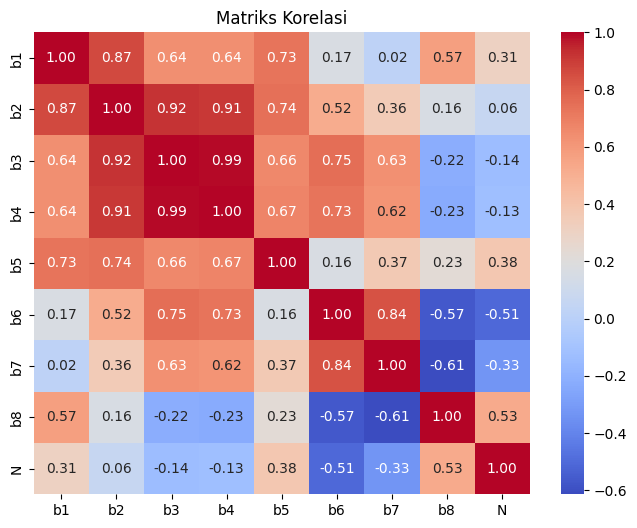

In [17]:
# Visualisasi Heatmap Korelasi
import seaborn as sns
import matplotlib.pyplot as plt

cols_label = df[['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'N']]

plt.figure(figsize=(8, 6))
sns.heatmap(cols_label.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

### Pembagian Data Training dan Test

In [26]:
from sklearn.model_selection import train_test_split

# Membuat Variabel terikat dan variabel bebas
# Variabel y (target)
y = df['N']

# Variabel X (Features)
X = df[['b1', 'b2', 'b3', 'b4', 'b5']]

# Membagi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)
# Cetak
print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

Jumlah data training: 475
Jumlah data testing: 119


### Training Model

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Evaluasi Model

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Koefisien : ", model.coef_[0])
print("Intercept : ", model.intercept_)
print("R2 Score : ", r2)
print("Mae :", mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

Koefisien :  -0.19855537917015287
Intercept :  1.9490767777036742
R2 Score :  0.41763335984868344
Mae : 0.24020512769628902
RMSE : 0.2969807514957791


### Persamaan Regresi

In [29]:
slope = model.coef_[0]
intercept = model.intercept_
print(f"Persamaan: y = {slope:.3f} * x + {intercept:.3f}")

Persamaan: y = -0.199 * x + 1.949


### Plot Regresi

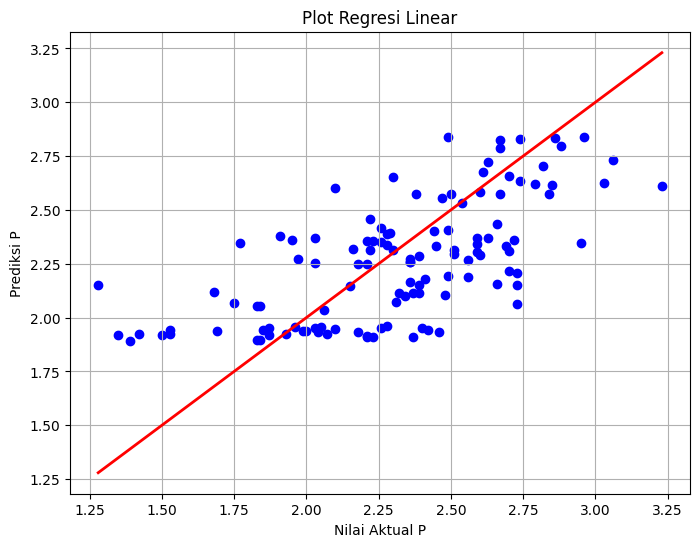

In [31]:
import matplotlib.pyplot as plt

# Plot data Scatter
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Data Aktual')
# Garis Regresi
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color='red', linewidth=2, label='Garis Regresi')
plt.xlabel('Nilai Aktual P')
plt.ylabel('Prediksi P')
plt.title('Plot Regresi Linear')
plt.grid()
plt.show()